Mejora de Imagenes

In [4]:
from skimage import io, exposure, img_as_float, restoration
import matplotlib.pyplot as plt


Image 1 - Playground

/Users/fredycerna/Library/Mobile Documents/com~apple~CloudDocs/Fredy/Maestria/S1 - Vision Artificial/Actividades/mejora_imagenes/myenv/lib/python3.12/site-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.0].


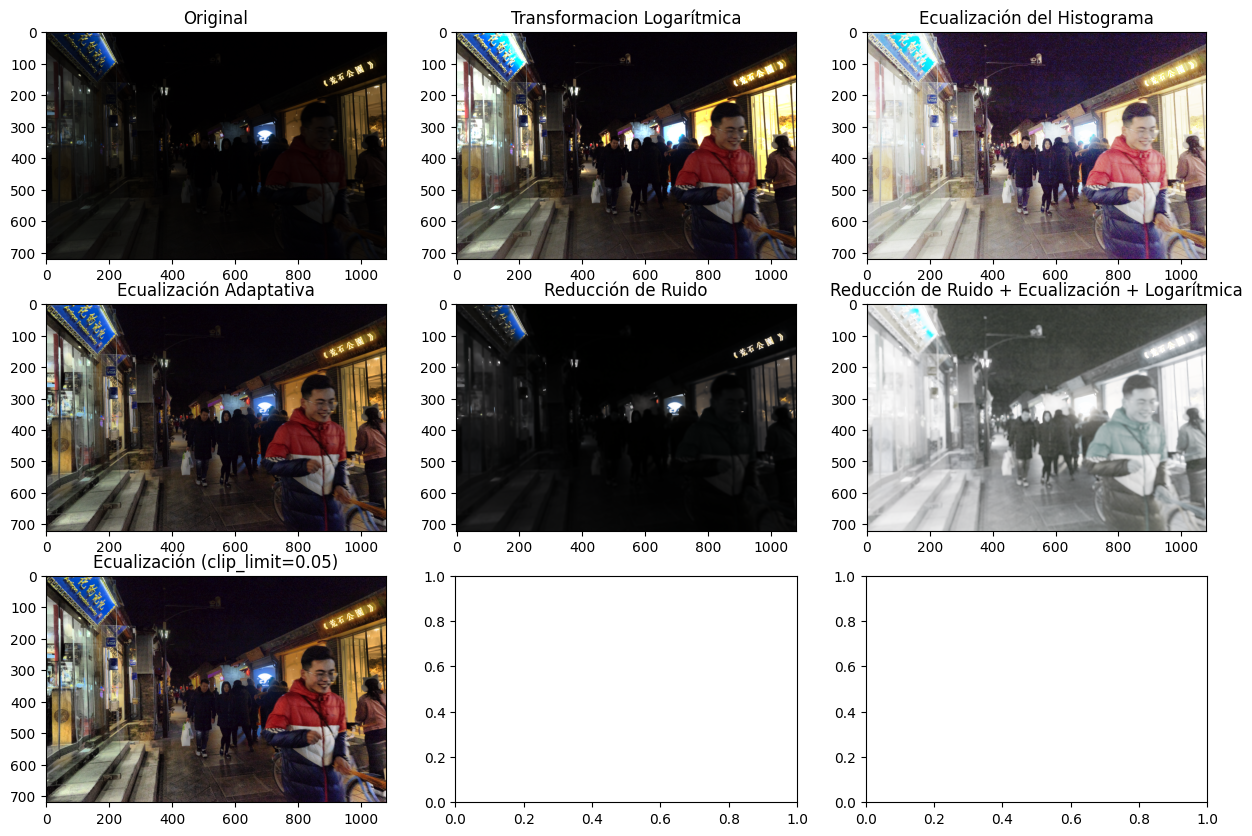

In [15]:
# Cargar la imagen desde un directorio
path1 = './images/1.png'
image1 = img_as_float(io.imread(path1))

# Aplicar la transformación logarítmica 
img1_log = exposure.adjust_log(image1, gain=4)

# Aplicar ecualización del histograma
img1_eq = exposure.equalize_hist(image1)

# Aplicar ecualización adaptativa
img1_adapteq = exposure.equalize_adapthist(image1, clip_limit=0.03)

# Aplicar reducción de ruido
img1_denoised = restoration.denoise_nl_means(image1, h=0.1, fast_mode=True, patch_size=5, patch_distance=3)

# Buscando solucion optima combinando tranformaciones

# Combinar reducción de ruido, ecualización del histograma y transformación logarítmica
# Paso 1: Aplicar reducción de ruido 
image_denoised = restoration.denoise_nl_means(image1, h=0.1, fast_mode=True, patch_size=5, patch_distance=3) 
# Paso 2: Aplicar ecualización del histograma 
img_eq = exposure.equalize_hist(image_denoised) 
# Paso 3: Aplicar transformación logarítmica 
img_comb1 = exposure.adjust_log(img_eq, gain=1)

# Combinar reducción de ruido, ecualizacion adaptativa
# Paso 1: Aplicar reducción de ruido 
image_denoised = restoration.denoise_nl_means(image1, h=0.1, fast_mode=True, patch_size=5, patch_distance=3) 
# Paso 2: Aplicar ecualización del histograma 
img_comb2 = exposure.equalize_adapthist(image_denoised, clip_limit=0.03)     

# Usando equilización adaptativa con otro valor de clip_limit
img_comb3 = exposure.equalize_adapthist(image1, clip_limit=0.05)     


# Mostrar imagen original y transformada
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()
axes[0].imshow(image1)
axes[0].set_title("Original")
axes[1].imshow(img1_log)
axes[1].set_title("Transformacion Logarítmica")
axes[2].imshow(img1_eq)
axes[2].set_title("Ecualización del Histograma")
axes[3].imshow(img1_adapteq)
axes[3].set_title("Ecualización Adaptativa")
axes[4].imshow(img1_denoised)
axes[4].set_title("Reducción de Ruido")
axes[5].imshow(img_comb1)
axes[5].set_title("Reducción de Ruido + Ecualización + Logarítmica")
axes[6].imshow(img_comb2)
axes[6].set_title("Reducción de Ruido + Ecualización")
axes[6].imshow(img_comb3)
axes[6].set_title("Ecualización (clip_limit=0.05)")

plt.show()


Aplicando las transformaciones mas prometedoras a todas las imagenes para seleccionar la mejor opcion en cada caso. 

/Users/fredycerna/Library/Mobile Documents/com~apple~CloudDocs/Fredy/Maestria/S1 - Vision Artificial/Actividades/mejora_imagenes/myenv/lib/python3.12/site-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.0].


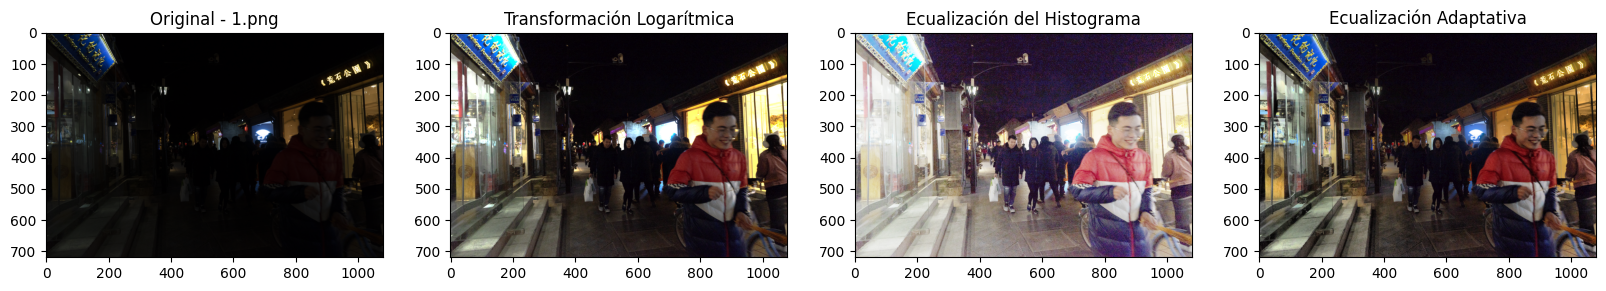

/Users/fredycerna/Library/Mobile Documents/com~apple~CloudDocs/Fredy/Maestria/S1 - Vision Artificial/Actividades/mejora_imagenes/myenv/lib/python3.12/site-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.0].


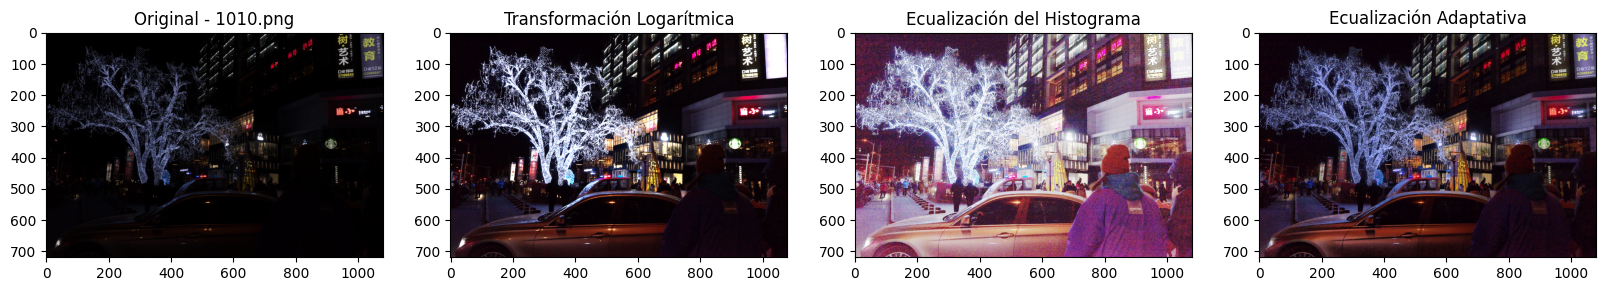

/Users/fredycerna/Library/Mobile Documents/com~apple~CloudDocs/Fredy/Maestria/S1 - Vision Artificial/Actividades/mejora_imagenes/myenv/lib/python3.12/site-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.0].


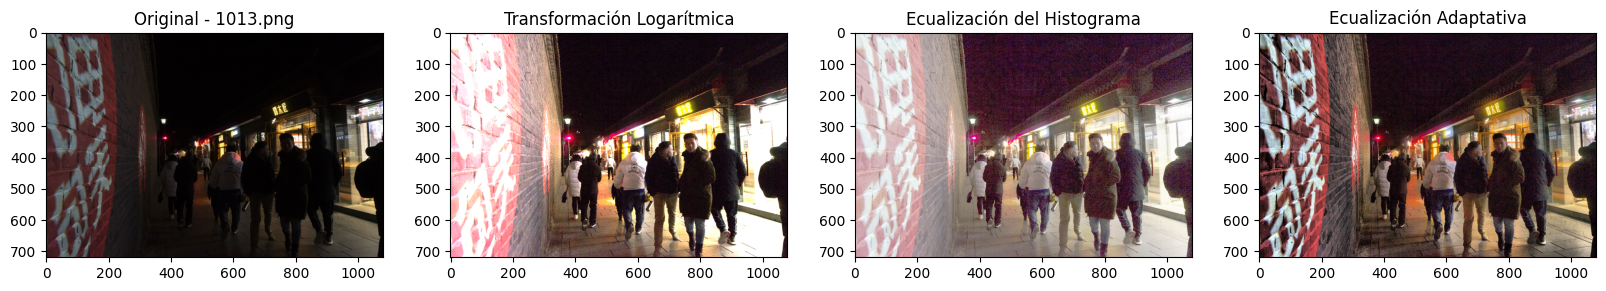

/Users/fredycerna/Library/Mobile Documents/com~apple~CloudDocs/Fredy/Maestria/S1 - Vision Artificial/Actividades/mejora_imagenes/myenv/lib/python3.12/site-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.0].


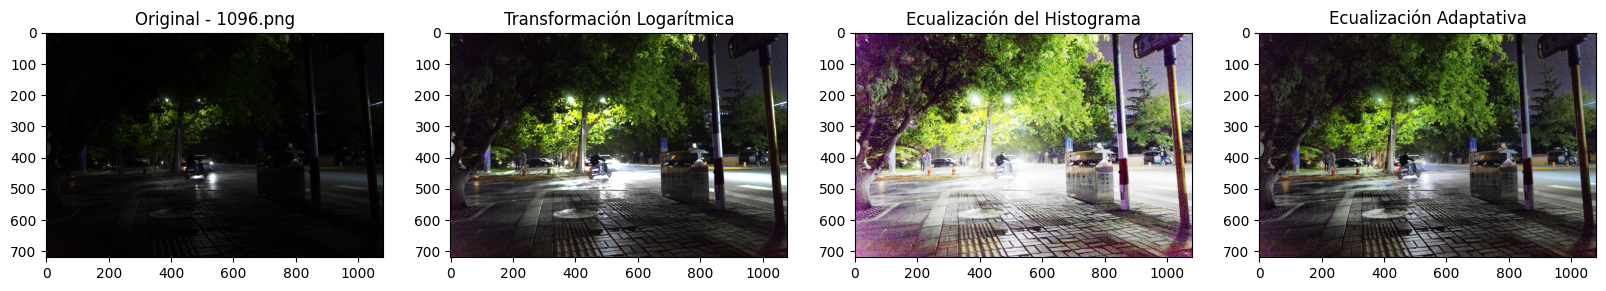

In [17]:
from skimage import io, exposure, img_as_float
import matplotlib.pyplot as plt

# Ruta al directorio de las imágenes
image_dir = './images/'

# Lista de nombres de archivo
image_files = ['1.png', '1010.png', '1013.png', '1096.png']

# Función para aplicar las transformaciones
def apply_transformations(image):
    # Transformación logarítmica
    img_log = exposure.adjust_log(image, gain=4)
    # Ecualización del histograma
    img_eq = exposure.equalize_hist(image)
    # Ecualización adaptativa del histograma
    img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.04)
    
    return img_log, img_eq, img_adapteq

# Iterar sobre cada archivo de imagen en la lista
for image_file in image_files:
    # Construir la ruta completa a la imagen
    image_path = image_dir + image_file
    
    # Cargar la imagen
    image = img_as_float(io.imread(image_path))
    
    # Aplicar las transformaciones
    img_log, img_eq, img_adapteq = apply_transformations(image)
    
    # Mostrar las imágenes originales y mejoradas
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(image)
    axes[0].set_title(f"Original - {image_file}")
    axes[1].imshow(img_log)
    axes[1].set_title("Transformación Logarítmica")
    axes[2].imshow(img_eq)
    axes[2].set_title("Ecualización del Histograma")
    axes[3].imshow(img_adapteq)
    axes[3].set_title("Ecualización Adaptativa")
    plt.show()


Imagen 1 (1.png) - Transformación Logarítmica

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.0].


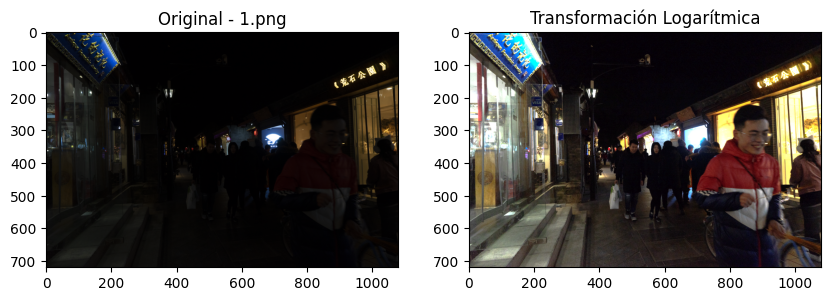

In [19]:
from skimage import io, exposure, img_as_float
import matplotlib.pyplot as plt

# Ruta al directorio de las imágenes
image_dir = './images/'
image_file = '1.png'
image_path = image_dir + image_file

# Cargar la imagen
image = img_as_float(io.imread(image_path))

# Aplicar la transformación logarítmica
img_log = exposure.adjust_log(image, gain=4)

# Mostrar imagen original y transformada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original - 1.png")
axes[1].imshow(img_log)
axes[1].set_title("Transformación Logarítmica")
plt.show()


Imagen 1010 (1010.png) - Transformación Logarítmica

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8.0].


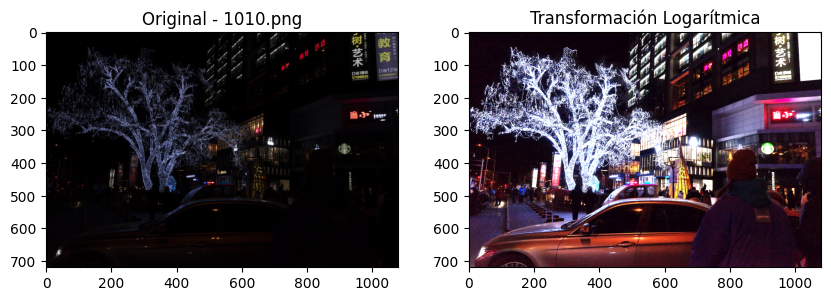

In [29]:
# Ruta al directorio de las imágenes
image_dir = './images/'
image_file = '1010.png'
image_path = image_dir + image_file

# Cargar la imagen
image = img_as_float(io.imread(image_path))

# Aplicar la transformación logarítmica
img_log = exposure.adjust_log(image, gain=8)

# Mostrar imagen original y transformada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original - 1010.png")
axes[1].imshow(img_log)
axes[1].set_title("Transformación Logarítmica")
plt.show()


Imagen 1013 (1013.png) - Ecualización Adaptativa

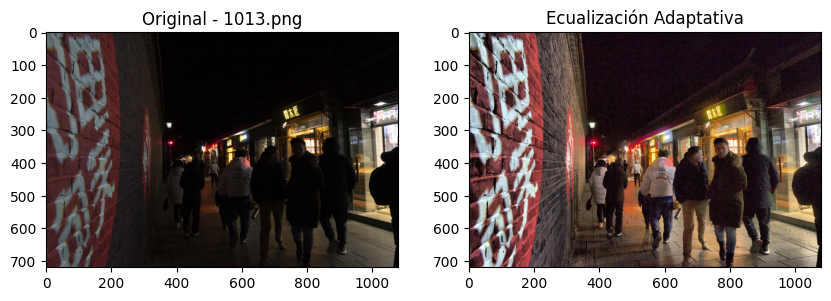

In [21]:
# Ruta al directorio de las imágenes
image_dir = './images/'
image_file = '1013.png'
image_path = image_dir + image_file

# Cargar la imagen
image = img_as_float(io.imread(image_path))

# Aplicar ecualización adaptativa del histograma
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Mostrar imagen original y transformada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original - 1013.png")
axes[1].imshow(img_adapteq)
axes[1].set_title("Ecualización Adaptativa")
plt.show()


Imagen 1096 (1096.png) - Ecualización Adaptativa

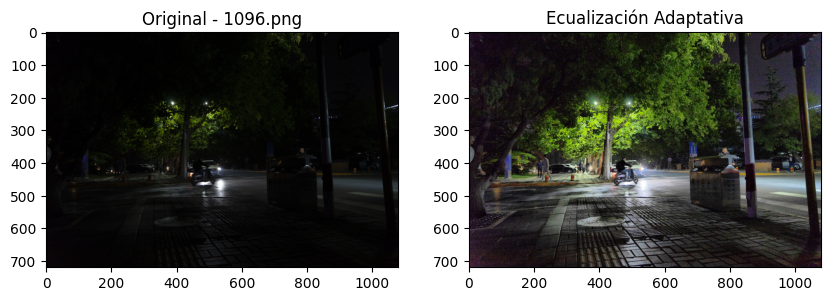

In [22]:
# Ruta al directorio de las imágenes
image_dir = './images/'
image_file = '1096.png'
image_path = image_dir + image_file

# Cargar la imagen
image = img_as_float(io.imread(image_path))

# Aplicar ecualización adaptativa del histograma
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Mostrar imagen original y transformada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original - 1096.png")
axes[1].imshow(img_adapteq)
axes[1].set_title("Ecualización Adaptativa")
plt.show()
